#Iris Flower: Automatic Classification
####Iris is the family in the flower which contains the several species such as the iris.setosa, iris.versicolor, iris.virginica, etc. 

150 samples  
3 labels: species of Iris (Iris setosa, Iris virginica, & Iris versicolor)  
4 features: Sepal length, Sepal width, Petal length, & Petal Width in cm  

The purpose of this notebook is to try out a few algorithms for classification of the Iris Flower.    
Pre processing (scanling the data, basically) and then cover the following algorithms: Suport vector Classification (SVM), K-nn, XGBoost, Decision Tree and Random Forest.  
For each one, I will compute the model accuracy both for the test dataset. 

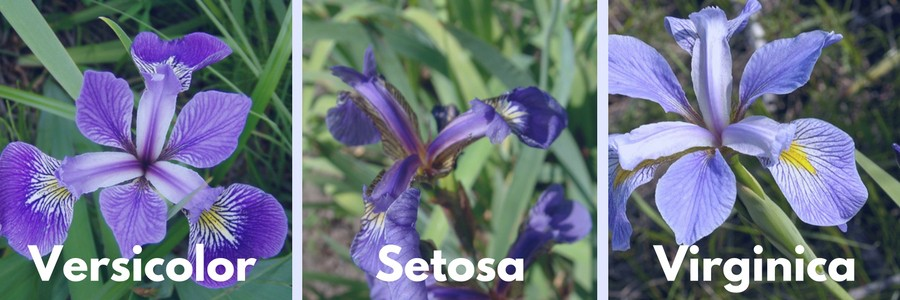

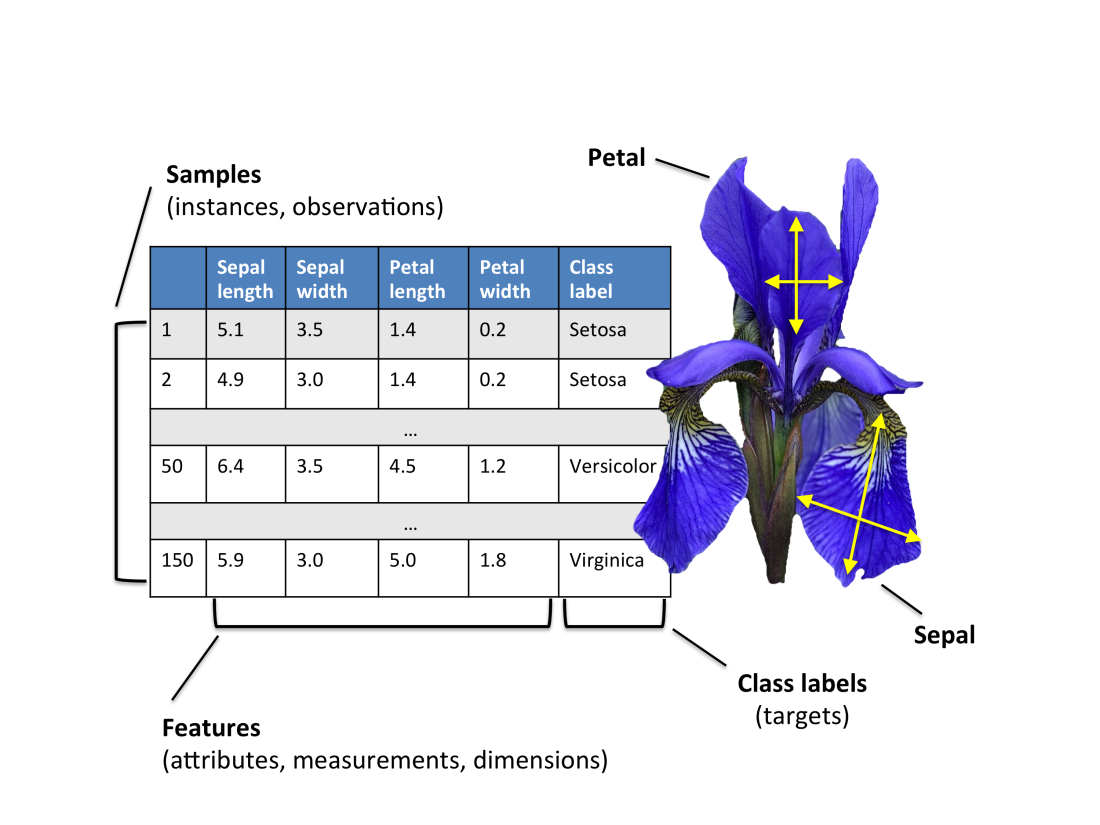

##Packages

In [ ]:
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import  datasets, tree, neighbors
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

##Import Iris Data
3 target classification Groups: Setosa, Versicoler, & Virginica

In [ ]:
iris=datasets.load_iris()
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

#Visualize Data
Note how there's some overlap, the model will aid in the classification

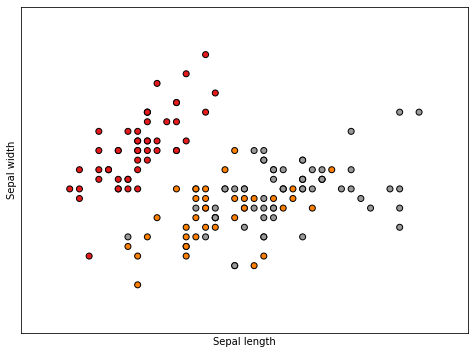

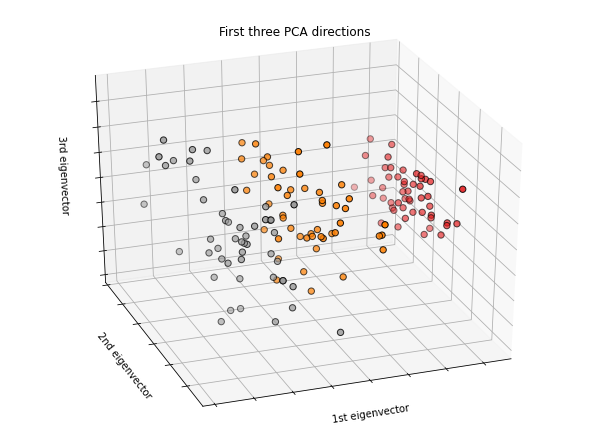

In [ ]:
# import some data to play with
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

##Scale & Splitting the dataset  
Since our process involve training and testing, We should split our dataset.It can be executed by the following code avoiding unwanted bias using the stratified shuffle split accross the 3 types of flowers.

In [ ]:
sc = StandardScaler()
sc.fit(iris.data)
x=sc.transform(iris.data) 
y=iris.target
#Stratified Shuffle split
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(iris.data, iris.target)
for train_index, test_index in sss.split(iris.data, iris.target):
  print("TRAIN:", train_index, "TEST:", test_index)
  x_train, x_test = iris.data[train_index], iris.data[test_index]
  y_train, y_test = iris.target[train_index], iris.target[test_index]

TRAIN: [ 16  69  15   4  78 138 111  10  93  45  74  58 106  22  56  28 107  27
  94  72  66  33 143  87  96 115  73  84  26 126  11  91 128 105  79  48
   7 148  31 119  59 124  38  57  95 101  83 137 112  52  92  30  63  42
  14 108 125 122 141  32 140  35  76  41   2  18 146 135 127 116  80  29
 104  82  34] TEST: [139  65 145   6 129  25  85  23 118  64  17 121  71  39  67  36 131 149
  24   0  89   8 136 110 132 147 117   9 130  75 134 144  97 114  19  43
  49  21  50  86  37  20  61  81   5 123  44  99  77 102  98   3 142  40
  88  60  12 103  53 109  90 133  70 100  13  47  54   1  51  68 113  62
 120  46  55]
TRAIN: [  7  10 141   6  94  31 113 140 108  11 128  96 149 110  98   4 101  44
   5   2 144 102 112  86  41  20  59 118 148 115  99 132  88  57 105 103
  83  45 138  62  74  81  52  13 114  67  40  47  82  33 106  38  18 135
  63  75  79  37  55  72  70 111  95 142  15  64 121  19  91  42  26 126
  12   1  69] TEST: [120  78  29  46  58 134 125  25  53  48  51 104 146 123

##Build, Train, & Predict The Model (Accuracy)
K-Nearest performed the best @~2.5% increase in Accuracy over all other bare bones classification methods
####K-Nearest Neighbor

In [ ]:
#classifier=tree.DecisionTreeClassifier() *"Model Classifcation Accuracy is  94.67 %"
classifier=neighbors.KNeighborsClassifier(leaf_size= 1, p=2, n_neighbors=5)

classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
print('The accuracy of the K-Nearest Neighbor classifier on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')

The accuracy of the K-Nearest Neighbor classifier on training data is  98.67 %


In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, scoring='accuracy')
#Fit the model
best_model = clf.fit(x_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

predictions=best_model.predict(x_test)
print('The accuracy of the K-Nearest Neighbor w/ best parametersclassifier on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')

Best leaf_size: 1
Best p: 2
Best n_neighbors: 5
The accuracy of the K-Nearest Neighbor w/ best parametersclassifier on training data is  98.67 %


SVM - Support Vector Classifation

In [ ]:
svm = SVC(kernel='rbf', random_state=1234, gamma=.10, C=1.0)
svm.fit(x_train, y_train)
predictions=svm.predict(x_test)
print('The accuracy of the SVM classifier on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')

The accuracy of the SVM classifier on training data is  96.0 %


In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,cv=10, refit=True,verbose=2)
grid.fit(x_train,y_train)
print(grid.best_estimator_)

best_svm = SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=1234, shrinking=True, tol=0.001,
    verbose=False)
best_svm.fit(x_train,y_train)
predictions = best_svm.predict(x_test)
print('The accuracy of the SVM w/ best parametersclassifier on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    1.1s finished


XGBoost

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=1234)
xgb_clf = xgb_clf.fit(x_train, y_train)
xgb_clf.fit(x_train, y_train)
predictions=xgb_clf.predict(x_test)
print('The accuracy of the XGBoost classifier on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')

The accuracy of the XGBoost classifier on training data is  96.0 %


Decision Tree

In [ ]:
decision_tree = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')
decision_tree.fit(x_train, y_train)
predictions=decision_tree.predict(x_test)
print('The accuracy of the Decision Tree classifier on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')


The accuracy of the Decision Tree classifier on training data is  94.67 %


In [ ]:
# importing libraries
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
('pca', pca),
('dec_tree', dec_tree)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components,
dec_tree__criterion=criterion,
dec_tree__max_depth=max_depth)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x_train, y_train)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 4
Best Number Of Components: 1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Random Forest

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
predictions=random_forest.predict(x_test)
print('The accuracy of the Random Forest classifier on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')

The accuracy of the Random Forest classifier on training data is  94.67 %


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=1234, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)
predictions=random_forest.predict(x_test)
print('The accuracy of the Random Forest classifier w/ Grid Search hypertuning on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 18.6min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

Determin best # of K-groups for K-Nearest Method

AttributeError: ignored

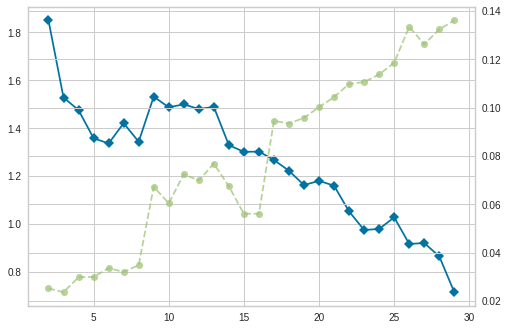

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(x_test)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

AttributeError: ignored

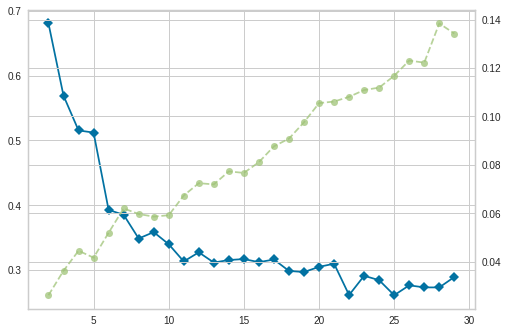

In [ ]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(x_test)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

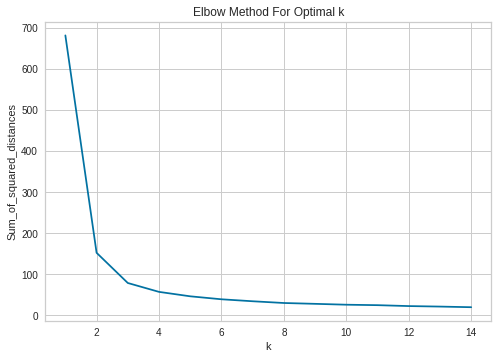

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(iris.data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#Visualization of the Results
###Best accuracy of 99% was with KNN. See the visualization below. Note most overalp was between Versicolor and Virginica. This relationship requires further research and mining to draw out these nuances.

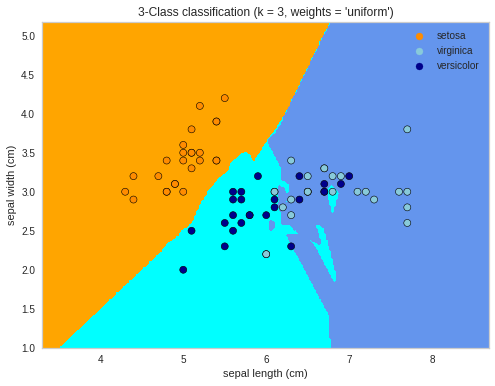

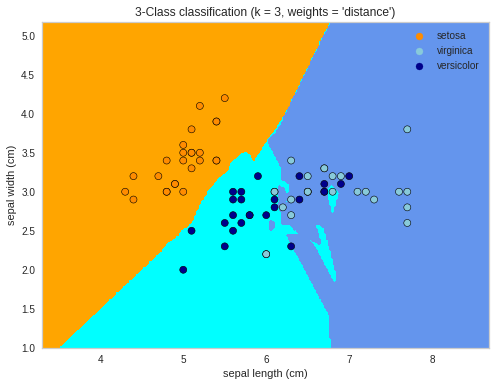

In [ ]:
n_neighbors = 3

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = x_test[:, :2]
y = y_test

h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()